In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import gzip
import random

In [2]:
def load_mnist(path,kind='train'):
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(),dtype=np.uint8,offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(),dtype=np.uint8,offset=16).reshape(len(labels), 784)

    return images, labels

X_train, y_train = load_mnist('data', kind='train')
X_test, y_test = load_mnist('data', kind='t10k')

# print(X_train.shape,y_train.shape)
# print(X_test.shape,y_test.shape)

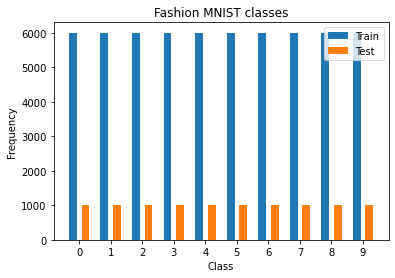

In [3]:
sprite = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

labels = ["%s" % i for i in range(10)]

unique, counts = np.unique(y_train, return_counts=True)
uniquet, countst = np.unique(y_test, return_counts=True)

fig, ax = plt.subplots()
rects1 = ax.bar(unique - 0.2, counts, 0.25, label='Train')
rects2 = ax.bar(unique + 0.2, countst, 0.25, label='Test')
ax.legend()
ax.set_xticks(unique)
ax.set_xticklabels(labels)

plt.title('Fashion MNIST classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

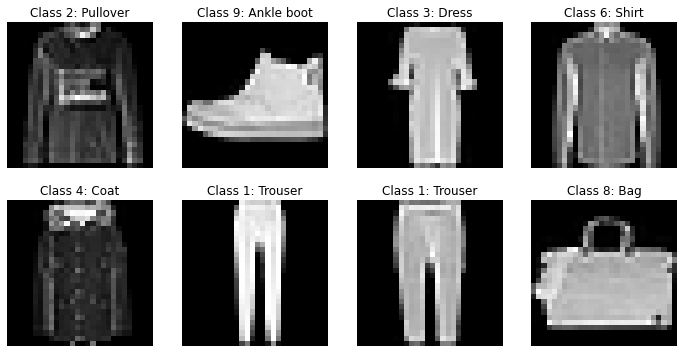

In [4]:
fig, ax = plt.subplots(2, 4, figsize = (12, 6))
ran = random.randrange(100)

for i in range(8):
    ax[i//4, i%4].imshow(X_train[i+ran].reshape(28,28), cmap='gray')
    ax[i//4, i%4].axis('off')
    ax[i//4, i%4].set_title("Class %d: %s" 
                            %(y_train[i+ran],sprite[y_train[i+ran]]))
    
plt.show()
